# Phase Changes of Matter

Snow scientists come from all different fields, bringing different perspectives to a subject that is complicated and research-worthy in chemistry, physics, materials science, geology, hydrology, and atmospheric science. 

One first step is to review the fundamental of physical chemistry and what makes the water molecule unique. Wikipedia is a good place to start to learn more about the [phase diagram](https://en.wikipedia.org/wiki/Phase_diagram).  To understand this in much more detail, you may want to check out [LibreTexts in Chemistry](https://chem.libretexts.org/Bookshelves/Physical_and_Theoretical_Chemistry_Textbook_Maps/Physical_Chemistry_(LibreTexts)/23%3A_Phase_Equilibria).

It's worthwhile to review the basics of thermodynamics (often included as part of a physical chemistry class).  In particular, we are interested in the internal energy of our snow, which is a mixture of ice, water, and air.

*Sensible Heat* can be defined as the sum of translational, vibrational, and rotational energies of molecules.  These movements increase with temperature; however, the relationship depends on molecular properties.

*Specific Heat* at a constant pressure c_p is defined as the energy required to raise the temperature of a substance by 1 degree celcius.

*Latent Heat* can be defined as the energy tied up in the phase of a system.  Intermolecular forces are strongest in solids and weakest in gases, and energy is required for molecules to move enough to escape the foreces of attraction between them. 

Let's import some packages we'll need, investigate the properties of water, ice, and snow, and make some basic calculations.

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# First, let's consider the basic thermodynamics of heating water, ice, and air, without phase changes.
# The following are defined at 1 atmosphere of pressure.
c_p_water = 4.2 #kJ K-1 kg-1
c_p_ice = 2.1 #kJ K-1 kg-1
c_p_air = 1.0 #kJ K-1 kg-1, note that this changes a lot with volume and pressure, we will neglect this for now

For a first step at intuition, let's ignore changes in pressure and resulting impacts on the gas phase for now.
Create a plot of how the temperature of 1 kg of a substance would change for each of water, ice, and air (considered generally for now) as a function of kJ of energy input for 0 to 1,000.

I've plotted for water and ice.  Add in air, with the understanding that when it heats it will expand, so this is a gross simplification at this point.

In [3]:
energy = range(0,1000,1)
cumdeltaT_water = np.divide(energy,c_p_water)
cumdeltaT_ice = np.divide(energy,c_p_ice)

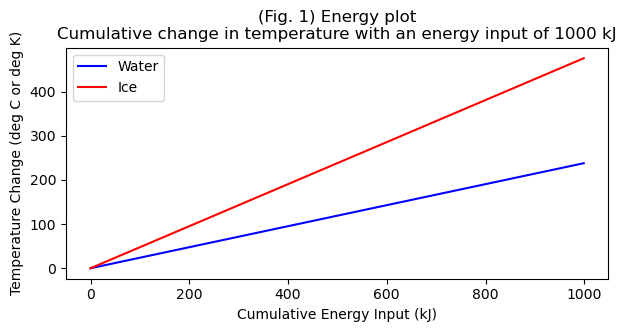

In [6]:


# Create a new figure for a timeseries plot
plt.figure(figsize=(7,3))

# Use the plot() function to plot the year on the x-axis, peak flow values on
# the y-axis with an open circle representing each peak flow value.
plt.plot(energy, # our x value
         cumdeltaT_water, # our y value
         linestyle='-', # plot a solid line
         color='blue',
         label='Water')

plt.plot(energy, # our x value
         cumdeltaT_ice, # our y value
         linestyle='-', # plot a solid line
         color='red',
         label='Ice')
        
# Label the axes and title.
plt.xlabel('Cumulative Energy Input (kJ)')
plt.ylabel('Temperature Change (deg C or deg K)')
plt.title('(Fig. 1) Energy plot\nCumulative change in temperature with an energy input of 1000 kJ');
plt.legend()

Now, let's presume that the temperature started at -10 C, so after 10 degrees temperature change, the kg of ice starts melting, and after 110 degrees temperature change, the water started evaporating.  Remake a plot similar to above incorporating the latent heat.  The latent heat values below will be helpful.

Note:  I liked this [web page](https://www.e-education.psu.edu/earth111/node/841), but I was sad they don't use metric units.  If you find a better reference, please let me know.

I also like this [Khan Academy video](https://www.youtube.com/watch?v=WU7TfO-iaK8) for the basics if you forgot freshman chem.

In [5]:
# latent heat of fusion for the ice-water transition
L_f = 334 #kJ/kg
# latent heat of vaporization for the water-vapor transition (evaporation)
L_v = 2256 #kJ/kg
# latent heat of vaporization for the ice-vapor transition (sublimation)
L_s = L_f + L_v #kJ/kg

In [46]:
# ice increasing in temp from -10 to 0
# +∆10˚C
# c_p_water = 4.2 #kJ / (K kg)
# starting point 
point0 = (0,-10)
# energy to bring 1 kg of ice from -10 to 0˚C
energy1 = 10*c_p_ice
point1 = (energy1, 0)
# energy to melt ice at 0˚C 
energy2 = L_f
point2 = (energy1 + energy2, 0)
# energy to bring 1kg of water from 0 to 100˚C
energy3 = 100*c_p_water
point3 = (energy1 + energy2 + energy3, 100)
# energy to evaporate water at 100˚C
energy4 = L_v
point4 = (energy1 + energy2 + energy3 + energy4, 100)
# energy to bring 1kg of water vapor from 100 to 110˚C
energy5 = 100*c_p_air
point5 = (energy1 + energy2 + energy3 + energy4 + energy5, 110)

h2o_energy_input, h2o_temp_change = list(zip(*[
    point0,
    point1,
    point2,
    point3,
    point4,
    point5
]))

Now consider the specific heat and latent heat of some other substances and compare them to water.  What is the importance of water being plentiful on our planet?

The specific heat capcity of ethanol:

* gas 1.6 kJ/kg K 
* liquid 2.57 kJ/kg K 
* solid 0.97 kJ/kgK

In [35]:
# First, let's consider the basic thermodynamics of heating water, ice, and air, without phase changes.
# The following are defined at 1 atmosphere of pressure.
c_p_ethanol_gas = 1.6
c_p_ethanol_liquid = 2.57
c_p_ethanol_solid = 0.97

# latent heat of fusion for the ice-water transition
L_f_ethanol = 109 #kJ/kg
# latent heat of vaporization for the water-vapor transition (evaporation)
L_v_ethanol = 846 #kJ/kg

In [41]:
# ice increasing in temp from -10 to 0
# +∆10˚C
# c_p_water = 4.2 #kJ / (K kg)
# starting point 
point0 = (0,-10)
# energy to bring 1 kg of ice from -10 to 0˚C
energy1 = 10*c_p_ethanol_solid
point1 = (energy1, 0)
# energy to melt ice at 0˚C 
energy2 = L_f_ethanol
point2 = (energy1 + energy2, 0)
# energy to bring 1kg of water from 0 to 100˚C
energy3 = 100*c_p_ethanol_liquid
point3 = (energy1 + energy2 + energy3, 100)
# energy to evaporate water at 100˚C
energy4 = L_v_ethanol
point4 = (energy1 + energy2 + energy3 + energy4, 100)
# energy to bring 1kg of water vapor from 100 to 110˚C
energy5 = 100*c_p_ethanol_gas
point5 = (energy1 + energy2 + energy3 + energy4 + energy5, 110)

ethanol_energy_input, ethanol_temp_change = list(zip(*[
    point0,
    point1,
    point2,
    point3,
    point4,
    point5
]))

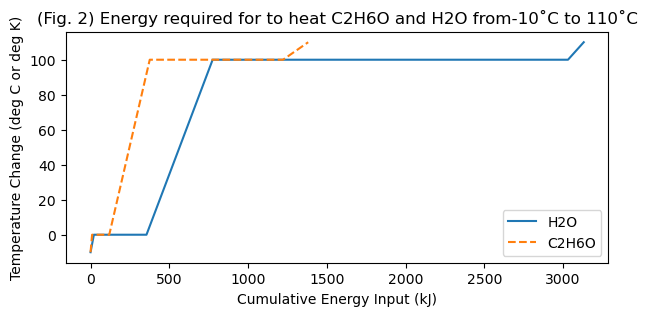

In [50]:
# Create a new figure for a timeseries plot
plt.figure(figsize=(7,3))
plt.plot(h2o_energy_input, h2o_temp_change, label='H2O')
plt.plot(ethanol_energy_input, ethanol_temp_change, label='C2H6O', linestyle='--')
# Label the axes and title.
plt.xlabel('Cumulative Energy Input (kJ)')
plt.ylabel('Temperature Change (deg C or deg K)')
plt.title('(Fig. 2) Energy required for to heat C2H6O and H2O from-10˚C to 110˚C');
plt.legend()

Now consider the specific heat and latent heat of some other substances and compare them to water. What is the importance of water being plentiful on our planet?